In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chetankv/dogs-cats-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'dogs-cats-images' dataset.
Path to dataset files: /kaggle/input/dogs-cats-images


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print("Dataset path:", path)
print("\nTop-level folders:")
print(os.listdir(path))

Dataset path: /kaggle/input/dogs-cats-images

Top-level folders:
['dataset', 'dog vs cat']


In [ ]:
dataset_dir = os.path.join(path, "dataset")
print(os.listdir(dataset_dir))

['test_set', 'training_set']


In [ ]:
dataset_dir = os.path.join(path, "dataset")
cats_dir = os.path.join(dataset_dir, "training_set", "cats")
aug_dir = os.path.join("/content", "augmented_cats")

In [ ]:
os.makedirs(aug_dir, exist_ok=True)

In [ ]:
print("Cats images found:", len(os.listdir(cats_dir)))

Cats images found: 4000


In [ ]:
data = []

for img_name in os.listdir(cats_dir)[:100]:
    img_path = os.path.join(cats_dir, img_name)

    img = plt.imread(img_path)

    img = img[:224, :224]      # resize
    img = img / 255.0          # normalize

    plt.imsave(os.path.join(aug_dir, img_name), img)

    data.append([img_name, img.shape[0], img.shape[1]])

print("Preprocessing done ✅")


Preprocessing done ✅


In [ ]:
count = 0

for img_name in os.listdir(cats_dir)[:100]:
    img = plt.imread(os.path.join(cats_dir, img_name))
    img = img[:224, :224] / 255.0

    plt.imsave(f"{aug_dir}/img_{count}.jpg", img)
    count += 1

    plt.imsave(f"{aug_dir}/img_{count}.jpg", np.fliplr(img))
    count += 1

    plt.imsave(f"{aug_dir}/img_{count}.jpg", np.clip(img + 0.2, 0, 1))
    count += 1

print("Augmentation done 🎉")
print("Total images:", count)


Augmentation done 🎉
Total images: 300


In [ ]:
df = pd.DataFrame(data, columns=["Image", "Height", "Width"])
print(df.head())
print("Total images used:", len(df))

          Image  Height  Width
0  cat.3498.jpg     224    224
1   cat.891.jpg     224    224
2  cat.2842.jpg     224    224
3     cat.1.jpg     224    224
4   cat.115.jpg     224    224
Total images used: 100


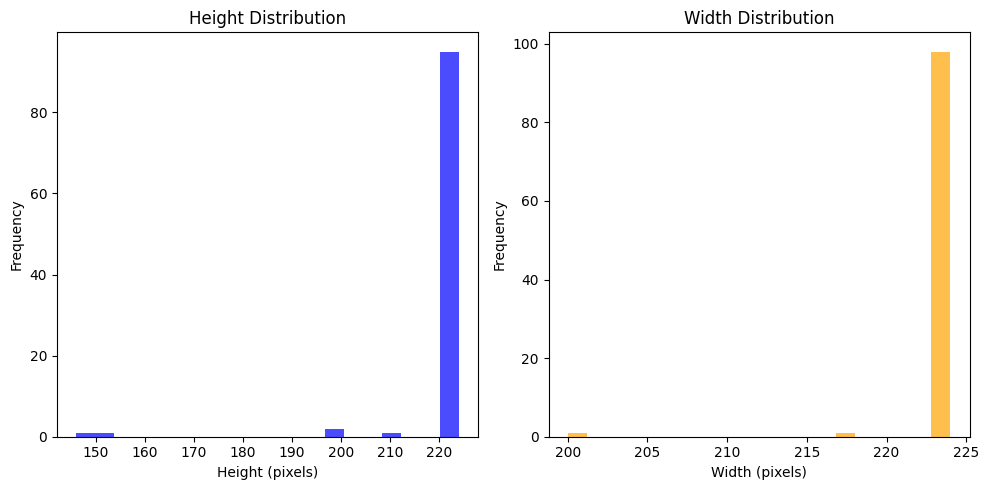

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df["Height"], bins=20, color="blue", alpha=0.7)
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(df["Width"], bins=20, color="orange", alpha=0.7)
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
plt.imsave(f"{aug_dir}/img_{count}.jpg", img)
count += 1
plt.show()

In [ ]:
 # 2️⃣ Horizontal Flip
plt.imsave(f"{aug_dir}/img_{count}.jpg", np.fliplr(img))
count += 1

In [ ]:
# 3️⃣ Vertical Flip
plt.imsave(f"{aug_dir}/img_{count}.jpg", np.flipud(img))
count += 1

In [ ]:
 # 4️⃣ Rotate 90°
plt.imsave(f"{aug_dir}/img_{count}.jpg", np.rot90(img))
count += 1

In [ ]:
 # 5️⃣ Rotate 180°
plt.imsave(f"{aug_dir}/img_{count}.jpg", np.rot90(img, 2))
count += 1

In [ ]:
 # 6️⃣ Brightness Increase
bright = np.clip(img + 0.3, 0, 1)
plt.imsave(f"{aug_dir}/img_{count}.jpg", bright)
count += 1

In [ ]:
# 7️⃣ Brightness Decrease
dark = np.clip(img - 0.3, 0, 1)
plt.imsave(f"{aug_dir}/img_{count}.jpg", dark)
count += 1

In [ ]:
# 8️⃣ Add Noise
noise = np.clip(img + 0.1*np.random.randn(*img.shape), 0, 1)
plt.imsave(f"{aug_dir}/img_{count}.jpg", noise)
count += 1

In [ ]:
# 9️⃣ Center Crop
h, w = img.shape[:2]
crop = img[h//4:3*h//4, w//4:3*w//4]
crop = np.resize(crop, img.shape)
plt.imsave(f"{aug_dir}/img_{count}.jpg", crop)
count += 1

In [ ]:
# 🔟 Color Channel Swap
swap = img[..., ::-1]
plt.imsave(f"{aug_dir}/img_{count}.jpg", swap)
count += 1


In [ ]:
print("✅ Augmentation Completed!")
print("Total images created:", count)

✅ Augmentation Completed!
Total images created: 310


In [ ]:
output_dir = "/kaggle/input/dogs-cats-images"
print(len(os.listdir(output_dir)))

2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


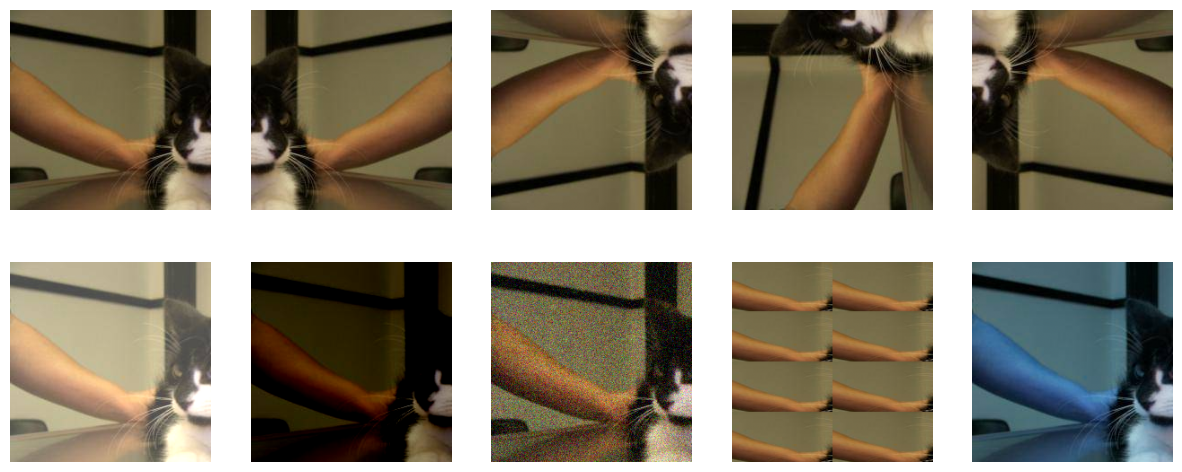

In [ ]:
img = plt.imread(img_path)
img = img[:224, :224]

if img.max() > 1:
    img = img / 255.0

augmented_images = []

augmented_images.append(img)
augmented_images.append(np.fliplr(img))
augmented_images.append(np.flipud(img))
augmented_images.append(np.rot90(img))
augmented_images.append(np.rot90(img,2))
augmented_images.append(np.clip(img+0.3,0,1))
augmented_images.append(np.clip(img-0.3,0,1))
augmented_images.append(np.clip(img+0.1*np.random.randn(*img.shape),0,1))

h,w = img.shape[:2]
crop = img[h//4:3*h//4, w//4:3*w//4]
crop = np.resize(crop,img.shape)
augmented_images.append(crop)

augmented_images.append(img[...,::-1])

plt.figure(figsize=(15,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(augmented_images[i])
    plt.axis("off")

plt.show()
